/home/lin/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:1003: UserWarning: Duplicate key in file "/home/lin/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc", line #197
  (fname, cnt))


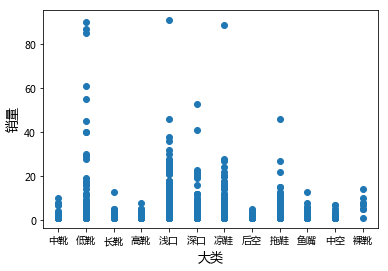

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from scipy import stats
from scipy.stats import norm,skew
all_data = pd.read_csv('sales所在周次节假日.csv')
all_data.head()
a1 = all_data.loc[lambda all_data: all_data['店铺名称'] == '深圳前进天虹']
fig, ax1 = plt.subplots()
ax1.scatter(x = a1['大类'], y = a1['销量'])
plt.ylabel('销量',fontsize=13)
plt.xlabel('大类',fontsize=13)
plt.show()

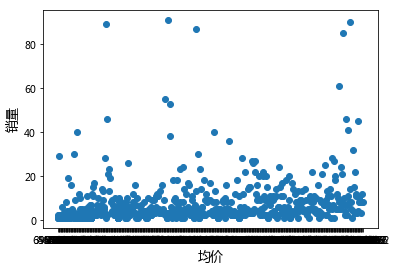

In [2]:
fig, ax2 = plt.subplots()
ax2.scatter(x = a1['均价'], y = a1['销量'])
plt.ylabel('销量',fontsize=13)
plt.xlabel('均价',fontsize=13)
plt.show()

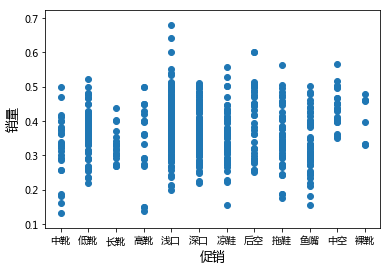

In [3]:
fig, ax3 = plt.subplots()
ax3.scatter(x = a1['大类'], y = a1['促销'])
plt.ylabel('销量',fontsize=13)
plt.xlabel('促销',fontsize=13)
plt.show()

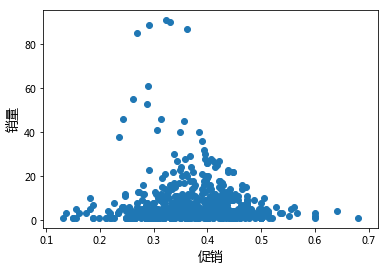

In [4]:
fig, ax3 = plt.subplots()
ax3.scatter(x = a1['促销'], y = a1['销量'])
plt.ylabel('销量',fontsize=13)
plt.xlabel('促销',fontsize=13)
plt.show()

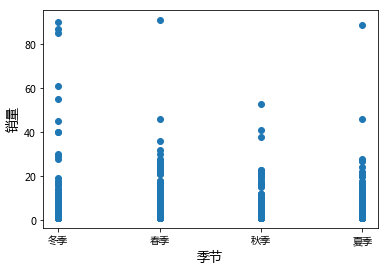

In [5]:
fig, ax3 = plt.subplots()
ax3.scatter(x = a1['季节'], y = a1['销量'])
plt.ylabel('销量',fontsize=13)
plt.xlabel('季节',fontsize=13)
plt.show()

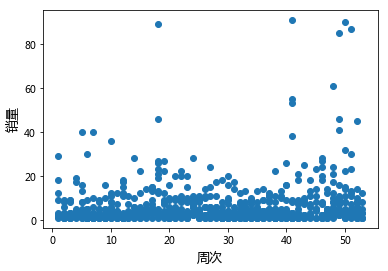

In [6]:
fig, ax3 = plt.subplots()
ax3.scatter(x = a1['周次'], y = a1['销量'])
plt.ylabel('销量',fontsize=13)
plt.xlabel('周次',fontsize=13)
plt.show()

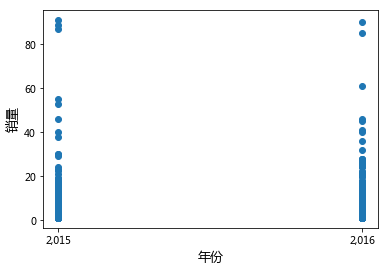

In [7]:
fig, ax3 = plt.subplots()
ax3.scatter(x = a1['年份'], y = a1['销量'])
plt.ylabel('销量',fontsize=13)
plt.xlabel('年份',fontsize=13)
plt.show()

/home/lin/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu = 6.94 and sigma = 10.45



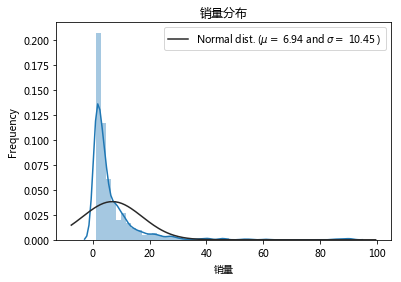

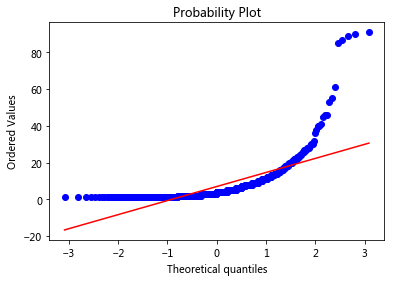

In [8]:
sns.distplot(a1['销量'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(a1['销量'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('销量分布')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(a1['销量'], plot=plt)
plt.show()

/home/lin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  



 mu = 1.66 and sigma = 0.82



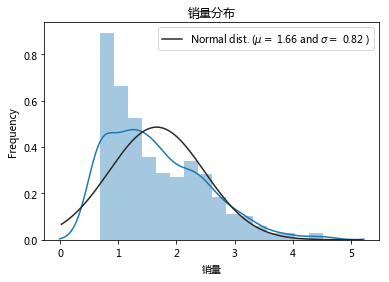

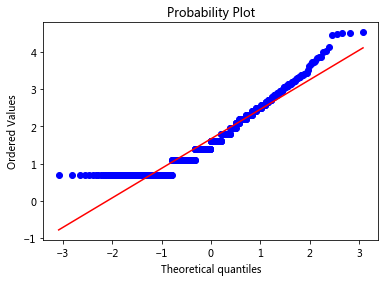

In [9]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
a1["销量"] = np.log1p(a1["销量"])

#Check the new distribution 
sns.distplot(a1["销量"] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(a1["销量"])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('销量分布')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(a1["销量"], plot=plt)
plt.show()

In [10]:
na1 = a1.shape[0]
a1.drop(['销量'], axis=1, inplace=True)
print("all_data size is : {}".format(a1.shape))
all_data_na = (a1.isnull().sum() / len(a1)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

all_data size is : (679, 9)


/home/lin/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Missing Ratio


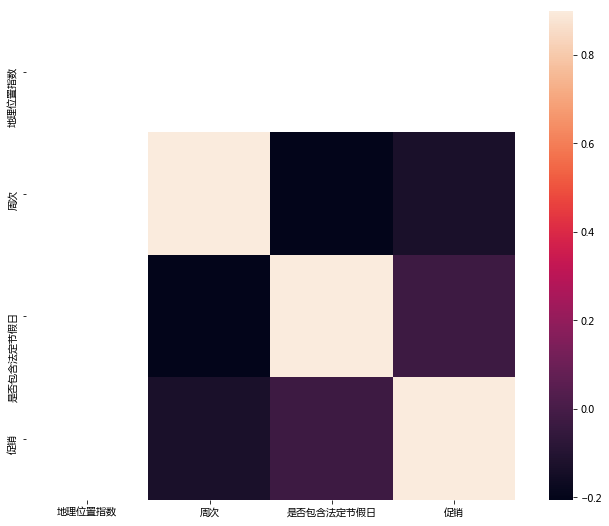

In [11]:
corrmat = a1.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [12]:
print (a1)

       店铺名称  地理位置指数     年份  周次  是否包含法定节假日  季节  大类           均价        促销
0    深圳前进天虹       7  2,015   1          1  冬季  中靴          599  0.374818
1    深圳前进天虹       7  2,015   1          1  冬季  低靴       506.66  0.367592
2    深圳前进天虹       7  2,015   1          1  冬季  长靴       683.83  0.325790
3    深圳前进天虹       7  2,015   1          1  冬季  高靴          800  0.400000
4    深圳前进天虹       7  2,015   1          1  春季  浅口        375.6  0.400000
5    深圳前进天虹       7  2,015   1          1  秋季  深口          366  0.333333
6    深圳前进天虹       7  2,015   2          0  冬季  中靴          799  0.470277
7    深圳前进天虹       7  2,015   2          0  冬季  低靴  645.8333333  0.467205
8    深圳前进天虹       7  2,015   2          0  春季  浅口          563  0.599574
9    深圳前进天虹       7  2,015   2          0  秋季  浅口          354  0.385201
10   深圳前进天虹       7  2,015   2          0  秋季  深口  392.3333333  0.346482
11   深圳前进天虹       7  2,015   3          0  冬季  中靴          499  0.312070
12   深圳前进天虹       7  2,015   3          0  冬季  低靴  

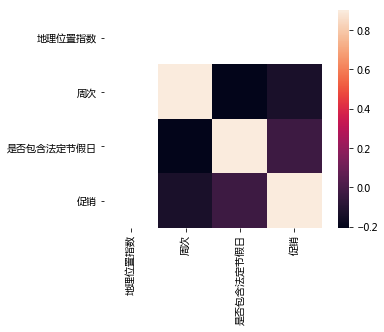

In [13]:
corrmat = a1.corr()

sns.heatmap(corrmat, vmax=0.9, square=True)

In [14]:
all_data.head()

,店铺名称,地理位置指数,年份,周次,是否包含法定节假日,季节,大类,销量,均价,促销
0,深圳前进天虹,7,"2,015",1,1,冬季,中靴,2,599,0.374818
1,深圳前进天虹,7,"2,015",1,1,冬季,低靴,29,506.66,0.367592
2,深圳前进天虹,7,"2,015",1,1,冬季,长靴,2,683.83,0.325790
3,深圳前进天虹,7,"2,015",1,1,冬季,高靴,2,800,0.400000
4,深圳前进天虹,7,"2,015",1,1,春季,浅口,1,375.6,0.400000


In [15]:
a2 = all_data.loc[lambda all_data: all_data['店铺名称'] == '深圳前进天虹']

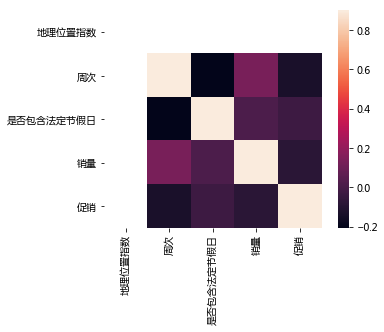

In [16]:
corrmat = a2.corr()

sns.heatmap(corrmat, vmax=0.9, square=True)

In [17]:
all_data.describe()

,地理位置指数,周次,是否包含法定节假日,销量,促销
count,18170.000000,18170.000000,18170.000000,18170.000000,18170.000000
mean,5.500826,27.653385,0.185581,7.885911,0.364673
std,2.597671,15.186189,0.388779,16.437344,0.092767
min,1.000000,1.000000,0.000000,1.000000,-0.558496
25%,7.000000,14.000000,0.000000,2.000000,0.305429
50%,7.000000,28.000000,0.000000,4.000000,0.368357
75%,7.000000,40.000000,0.000000,9.000000,0.421410
max,7.000000,53.000000,1.000000,912.000000,1.222469


In [19]:
all_data01 = pd.read_csv('sales所在周次节假日_剔除换货.csv')
all_data01.describe()

,地理位置指数,年份,周次,是否包含法定节假日,销量(剔除换货）,均价（剔除换货）,促销（剔除换货）
count,18163.000000,18163.000000,18163.000000,18163.000000,18163.000000,18163.000000,18163.000000
mean,5.501569,2015.552992,27.652701,0.185432,7.880031,399.822747,0.364135
std,2.597241,0.497198,15.181708,0.388658,16.436671,142.264912,0.089089
min,1.000000,2015.000000,1.000000,0.000000,1.000000,30.000000,0.032120
25%,7.000000,2015.000000,14.000000,0.000000,2.000000,307.981075,0.305955
50%,7.000000,2016.000000,28.000000,0.000000,4.000000,382.500000,0.368088
75%,7.000000,2016.000000,40.000000,0.000000,9.000000,459.225000,0.420665
max,7.000000,2016.000000,53.000000,1.000000,912.000000,1699.000000,0.902023


In [20]:
all_data01 = pd.read_csv('sales所在周次节假日_剔除换货负销量.csv')
all_data01.describe()

,地理位置指数,年份,周次,是否包含法定节假日,销量（剔除换货负销量,均价（剔除换货负销量）,促销（剔除换货负销量）
count,18465.000000,18465.000000,18465.000000,18465.000000,18465.000000,18465.000000,18465.000000
mean,5.503331,2015.552613,27.617872,0.184565,8.018792,403.695878,0.366986
std,2.596221,0.497238,15.184470,0.387955,16.505810,150.004270,0.094107
min,1.000000,2015.000000,1.000000,0.000000,1.000000,30.000000,0.032120
25%,7.000000,2015.000000,14.000000,0.000000,2.000000,309.166667,0.307159
50%,7.000000,2016.000000,28.000000,0.000000,4.000000,384.000000,0.370047
75%,7.000000,2016.000000,40.000000,0.000000,9.000000,463.333333,0.424161
max,7.000000,2016.000000,53.000000,1.000000,912.000000,2399.000000,1.222469


In [21]:
print(all_data)

           店铺名称  地理位置指数     年份  周次  是否包含法定节假日  季节  大类  销量           均价  \
0        深圳前进天虹       7  2,015   1          1  冬季  中靴   2          599   
1        深圳前进天虹       7  2,015   1          1  冬季  低靴  29       506.66   
2        深圳前进天虹       7  2,015   1          1  冬季  长靴   2       683.83   
3        深圳前进天虹       7  2,015   1          1  冬季  高靴   2          800   
4        深圳前进天虹       7  2,015   1          1  春季  浅口   1        375.6   
5        深圳前进天虹       7  2,015   1          1  秋季  深口   2          366   
6        深圳前进天虹       7  2,015   2          0  冬季  中靴   1          799   
7        深圳前进天虹       7  2,015   2          0  冬季  低靴   6  645.8333333   
8        深圳前进天虹       7  2,015   2          0  春季  浅口   1          563   
9        深圳前进天虹       7  2,015   2          0  秋季  浅口   2          354   
10       深圳前进天虹       7  2,015   2          0  秋季  深口   3  392.3333333   
11       深圳前进天虹       7  2,015   3          0  冬季  中靴   1          499   
12       深圳前进天虹       7  2,015   3    

In [18]:
all_data01 = pd.read_csv ('sales所在周次节假日_剔除换货')
all_data01.describe()

FileNotFoundError: File b'sales\xe6\x89\x80\xe5\x9c\xa8\xe5\x91\xa8\xe6\xac\xa1\xe8\x8a\x82\xe5\x81\x87\xe6\x97\xa5_\xe5\x89\x94\xe9\x99\xa4\xe6\x8d\xa2\xe8\xb4\xa7' does not exist